In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

In [3]:
df = pd.read_excel("./REG1.xlsx")
df.head()

,A1,A2,A3,A4,B
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
np.round(df.describe(),2)

,A1,A2,A3,A4,B
count,48.00,48.00,48.00,48.00,48.00
mean,7.67,4241.83,5565.42,0.57,576.77
std,0.95,573.62,3491.51,0.06,111.89
min,5.00,3063.00,431.00,0.45,344.00
25%,7.00,3739.00,3110.25,0.53,509.50
50%,7.50,4298.00,4735.50,0.56,568.50
75%,8.12,4578.75,7156.00,0.60,632.75
max,10.00,5342.00,17782.00,0.72,968.00


In [5]:
np.round(stats.shapiro(df.A1),4)

array([0.9098, 0.0013])

In [6]:
np.round(stats.shapiro(df.A2),4)

array([0.9752, 0.3987])

In [7]:
np.round(stats.shapiro(df.A3),4)

array([0.925 , 0.0045])

In [8]:
np.round(stats.shapiro(df.A4),4)

array([0.961 , 0.1107])

Descriptives for normally distributed variables
||n|mean|sd|
|---|---|---|---|
|A4|48|0.57|0.06|
|A2|48|4241.83|573.62|

Descriptives for non-normally distributed variables
||n|min|Q1|Q2|Q3|max|
|---|---|---|---|---|---|---|
|A1|48|||
|A3|48||


Fit Model 1

In [9]:
model1 = smf.ols(formula="B~A1+A2+A3+A4",data=df).fit()

In [10]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      B   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     22.71
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           3.91e-10
Time:                        13:11:50   Log-Likelihood:                -266.79
No. Observations:                  48   AIC:                             543.6
Df Residuals:                      43   BIC:                             552.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    377.2911    185.541      2.033      0.048       3.112     751.471
A1           -34.7901     12.970     -2.682      0.010     -60.947      -8.633
A2            -0.0666      0.017     -3.867      0.000      -0.101      -0.032
A3            -0.0024      0.003     -0.716      0.478      -0.009       0.004
A4          1336.4494    192.298      6.950      0.000     948.643    1724.256
==============================================================================
Omnibus:                       15.040   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.510
Skew:                           1.056   Prob(JB):                     5.80e-05
Kurtosis:                       5.300   Cond. No.                     1.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.649   
Dependent Variable: B                AIC:                543.5892
Date:               2024-01-25 13:11 BIC:                552.9453
No. Observations:   48               Log-Likelihood:     -266.79 
Df Model:           4                F-statistic:        22.71   
Df Residuals:       43               Prob (F-statistic): 3.91e-10
R-squared:          0.679            Scale:              4396.5  
-----------------------------------------------------------------
               Coef.   Std.Err.    t    P>|t|   [0.025    0.975] 
-----------------------------------------------------------------
Intercept     377.2911 185.5412  2.0335 0.0482   3.1117  751.4706
A1            -34.7901  12.9702 -2.6823 0.0103 -60.9471   -8.6332
A2             -0.0666   0.0172 -3.8666 0.0004  -0.1013   -0.0319
A3             -0.0024   0.0034 -0.7158 0.4780  -0.0093    0.0044
A4           1336.4494 192.2981  6.9499 0.0000 948.6432 1724.2555
-----------------------------------------------------------------
Omnibus:              15.040       Durbin-Watson:          2.171 
Prob(Omnibus):        0.001        Jarque-Bera (JB):       19.510
Skew:                 1.056        Prob(JB):               0.000 
Kurtosis:             5.300        Condition No.:          198024
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 1.98e+05. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

$$
\widehat{y} = \widehat{\beta_{0}} + \widehat{\beta_{1}}\space x_{1} + \widehat{\beta_{2}}\space x_{2} + \widehat{\beta_{3}}\space x_{3} + \widehat{\beta_{4}}\space x_{4} \\
where \space \beta_{0} = intercept \\
x_{1} = petrol\space tax(cents\space per\space gallon) \\
x_{2} = average\space income(dollars) \\
x_{3} = proportion\space of\space population\space with\space their\space driver's\space licenses \\ 
x_{4} = paved highways (in miles) \\ 
y = consumption\space of\space petrol (millions\space of\space gallons)
$$

#### Removing outliers from boxplot

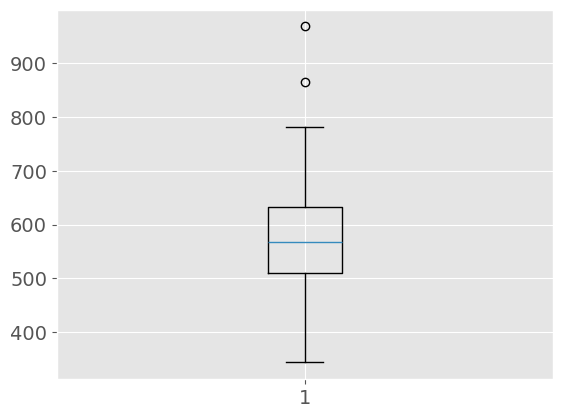

In [46]:
plt.boxplot(df.B)
plt.show()

In [47]:
q1 = np.quantile(df.B,0.25)
q3 = np.quantile(df.B,0.75)
med = np.median(df.B)
iqr = q3-q1

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
print(iqr,upper_bound,lower_bound)

123.25 817.625 324.625


In [49]:
outliers = df.B[(df.B <= lower_bound) | (df.B >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers.values))

The following are the outliers in the boxplot:[865 968]


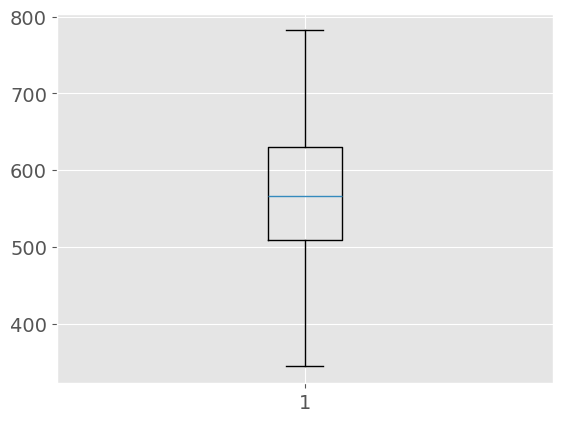

In [51]:
B_without_outliers = df.B[(df.B >= lower_bound) & (df.B <= upper_bound)]
plt.boxplot(B_without_outliers)
plt.show()

In [54]:
df1 = df.loc[df.B!=865,]
df1 = df1.loc[df1.B!=968,]
print(df.shape)
print(df1.shape)

(48, 5)
(46, 5)


Fit model 2

In [55]:
model2 = smf.ols(formula="B~A1+A2+A3+A4",data=df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      B   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     22.15
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           8.53e-10
Time:                        14:11:39   Log-Likelihood:                -243.84
No. Observations:                  46   AIC:                             497.7
Df Residuals:                      41   BIC:                             506.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    549.8523    150.723      3.648      0.001     245.461     854.243
A1           -32.2796     10.083     -3.201      0.003     -52.642     -11.917
A2            -0.0683      0.013     -5.108      0.000      -0.095      -0.041
A3            -0.0017      0.003     -0.639      0.527      -0.007       0.004
A4           989.4959    167.193      5.918      0.000     651.844    1327.148
==============================================================================
Omnibus:                        2.105   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.349   Jarque-Bera (JB):                1.273
Skew:                           0.374   Prob(JB):                        0.529
Kurtosis:                       3.325   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Seems model1 has better R-square value, lesser residual standard error (meaning better prediction of petrol consumption).

Therefore we will proceed with model1 and check assumptions required for linear regression.

### Checking Assumptions

In [20]:
plt.style.use('ggplot')

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [21]:
# fitted values (need a constant term for intercept)
model_fitted_y = model1.fittedvalues

# model residuals
model_residuals = model1.resid

# studentized residuals
model_norm_residuals = model1.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model1.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model1.get_influence().cooks_distance[0]

### Homoskedasticity
Residual Plot

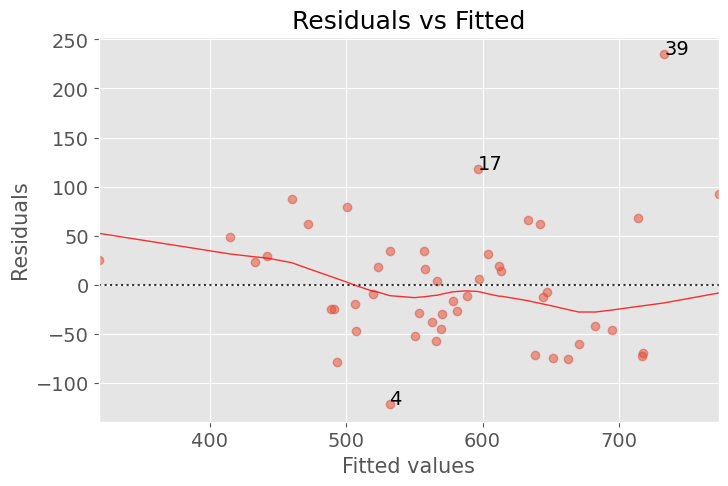

In [26]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(5)
plot_lm_1.set_figwidth(8)

plot_lm_1.axes[0] = sns.residplot(x=model_fitted_y, y='B', data=df, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

Scale Location Plot

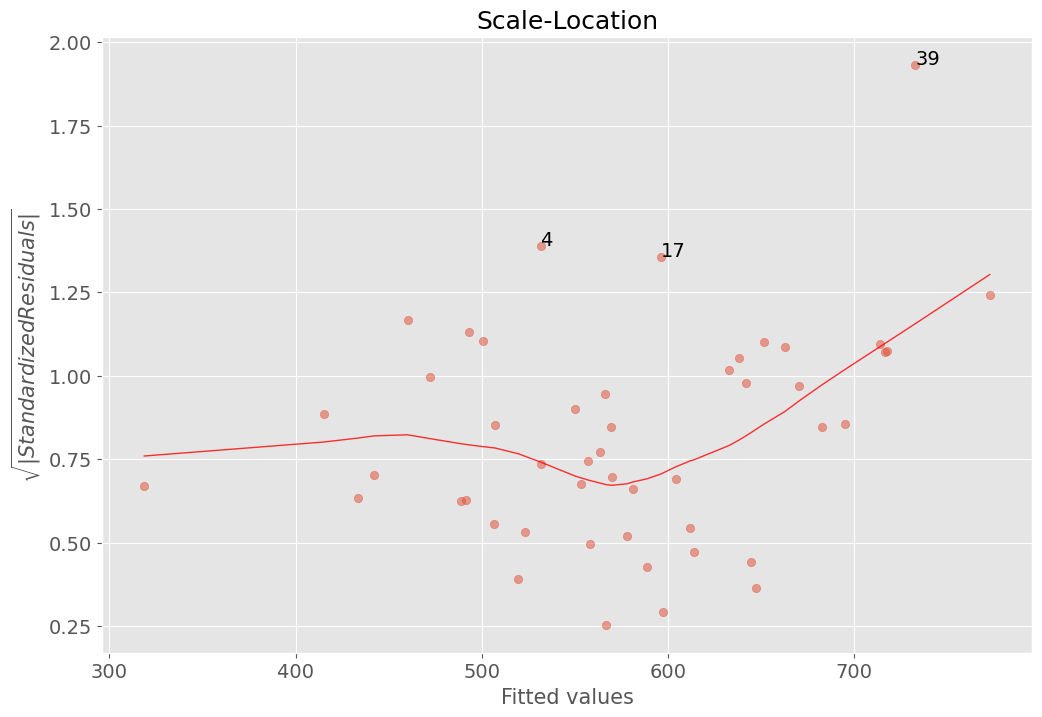

In [56]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(x=model_fitted_y,y= model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

In [64]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model1.resid, model1.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 6.569889351181651),
 ('p-value', 0.16043971173372917),
 ('f-value', 1.704709676589221),
 ('f p-value', 0.1664984004109392)]

#### Normality
Q-Q plot

/opt/conda/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


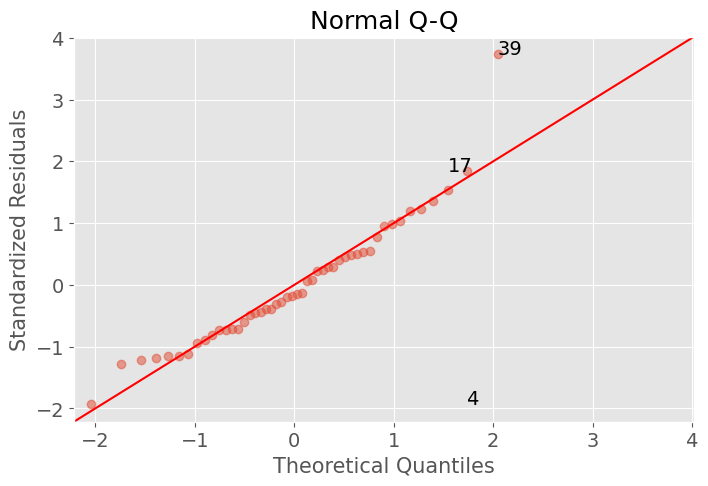

In [29]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(5)
plot_lm_2.set_figwidth(8)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

In [65]:
np.round(stats.shapiro(model1.resid),4)

array([0.9392, 0.0151])

Leverage Plot

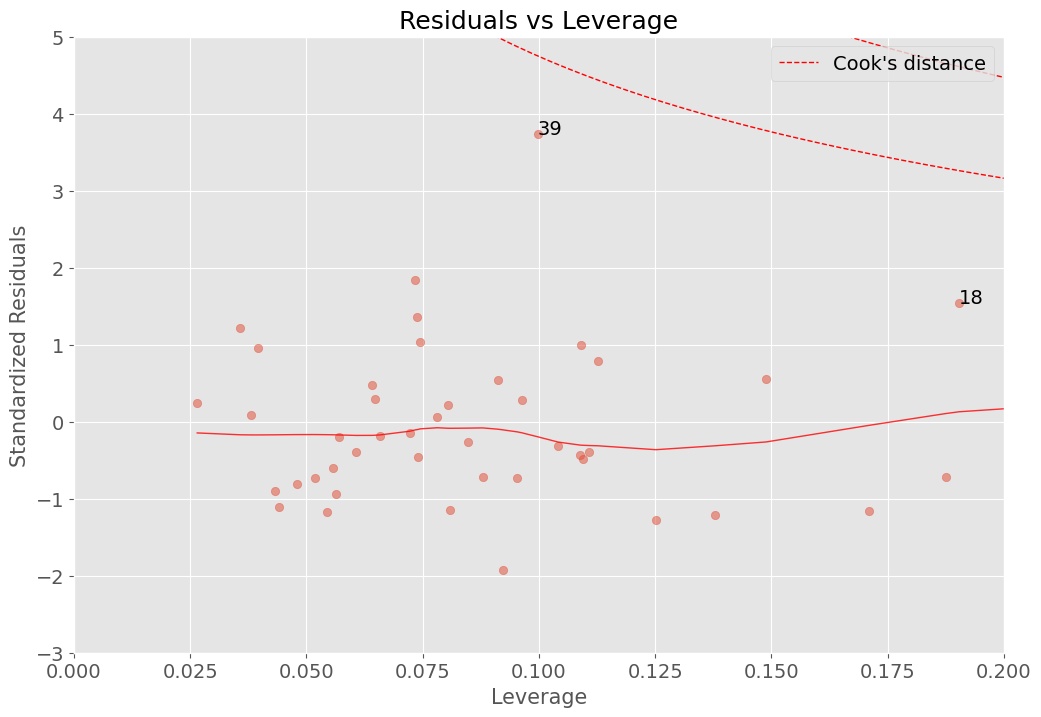

In [35]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(x=model_leverage, y=model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model1.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

### Influential Points

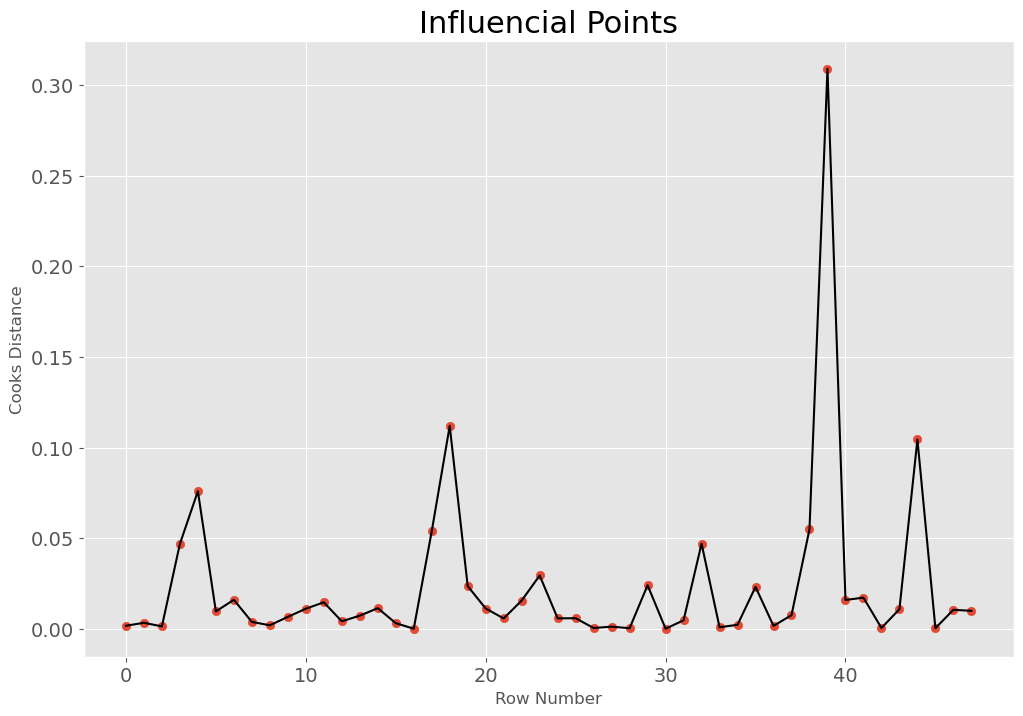

In [37]:
cooks  = model1.get_influence().cooks_distance

plt.figure(figsize=(12,8))
plt.scatter(df.index,cooks[0])
plt.plot(df.index,cooks[0],color='black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

In [38]:
mean_cooks = np.mean(cooks[0])
mean_cooks

0.02350657800148129

In [40]:
mean_cooks_list = [4*mean_cooks for i in df.index]

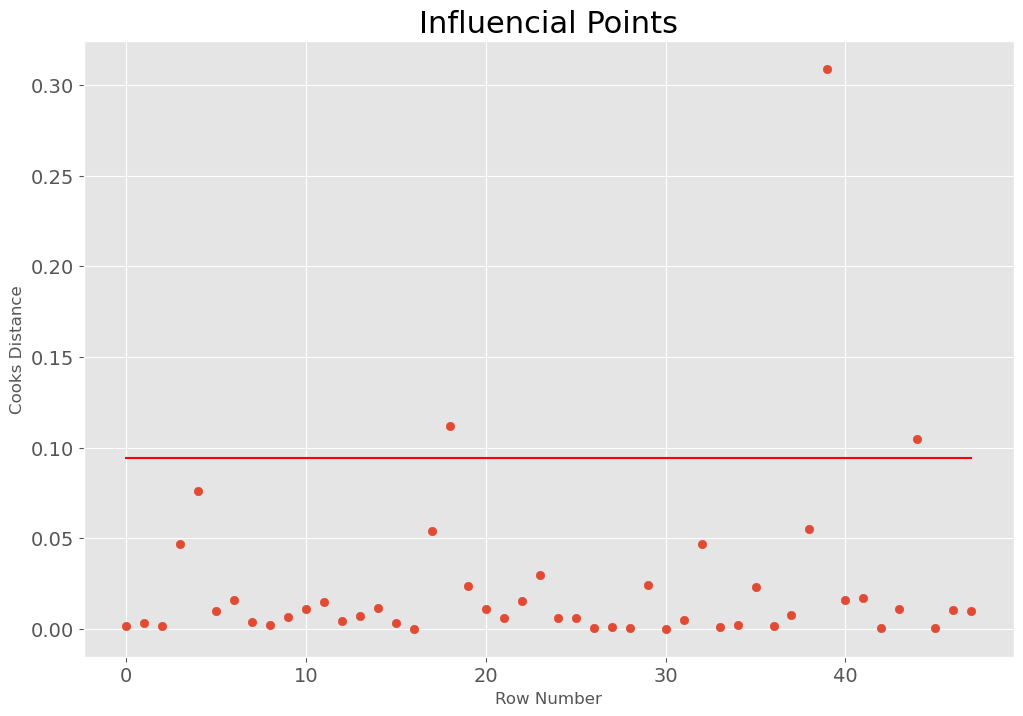

In [41]:
plt.figure(figsize = (12, 8))
plt.scatter(df.index, cooks[0])
plt.plot(df.index, mean_cooks_list, color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

In [42]:
influencial_points = df.index[cooks[0] > 4*mean_cooks]
influencial_points

Index([18, 39, 44], dtype='int64')

In [43]:
df.iloc[influencial_points, :]

,A1,A2,A3,A4,B
18,7.0,4716,5915,0.724,865
39,7.0,4345,3905,0.672,968
44,6.0,5215,2302,0.672,782


In [44]:
noninfluencial_points = df.index[cooks[0] < 4*mean_cooks]
noninfluencial_points
df.iloc[noninfluencial_points, :].head()

,A1,A2,A3,A4,B
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


#### Autocorrelation
durbin watson test

In [67]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model1.resid)

2.1707697077561834

The test statistic is 2.1708. Since this is within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model.

#### Multicollinearity

In [77]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('B ~ A1+A2+A3+A4', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif.iloc[1:,]

,VIF,variable
1,1.625676,A1
2,1.043274,A2
3,1.496937,A3
4,1.216355,A4


#### Linearity

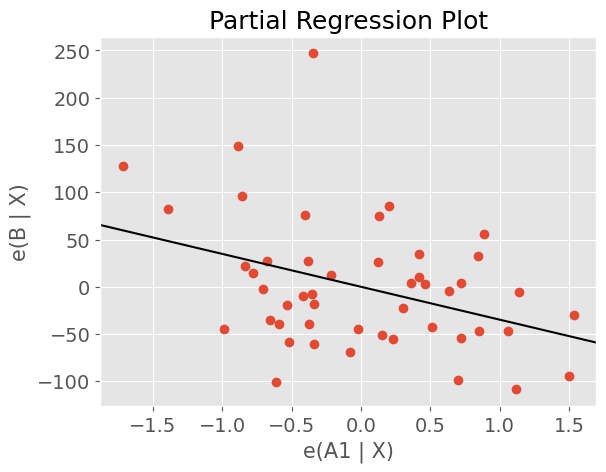

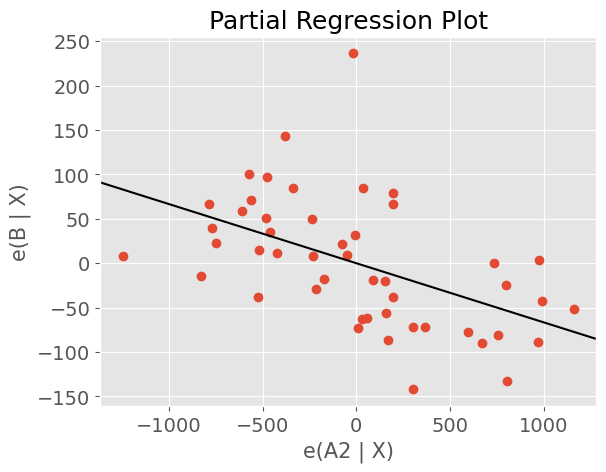

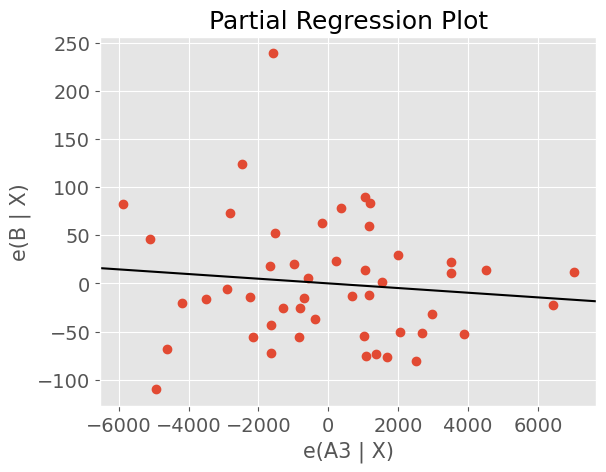

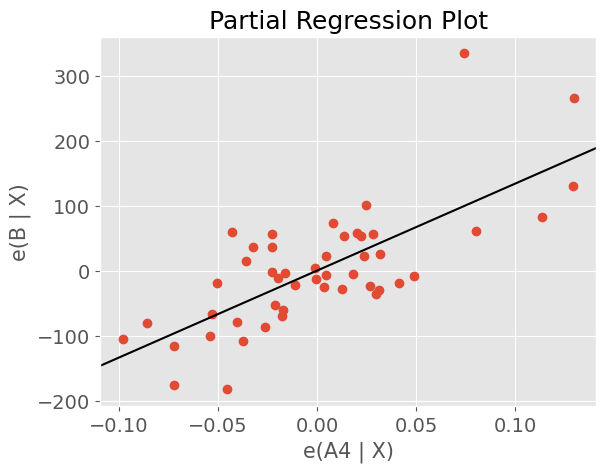

In [86]:
sm.graphics.plot_partregress("B", "A1", ["A2", "A3", "A4"], data=df,obs_labels=False)
sm.graphics.plot_partregress("B", "A2", ["A1", "A3", "A4"], data=df,obs_labels=False)
sm.graphics.plot_partregress("B", "A3", ["A2", "A1", "A4"], data=df,obs_labels=False)
sm.graphics.plot_partregress("B", "A4", ["A2", "A3", "A1"], data=df,obs_labels=False)
plt.show()

From scatter plots for each independent variable vs dependent variable, there is linear relationship b/w each of them. We can still there is an extreme outlier in the response variable (40th observation with value 968 - identified using boxplot earlier.). We can try removing it and checking if there is improvement in the model.

#### Stepwise Regression

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
                                k_features=3,
                                forward=True,
                                scoring='accuracy',
                                cv=None)
X = 
selected_features = sfs.fit(X, y)